In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/Depression-Detection/resources/main/Emotions%20NLP%20Data/test.txt',sep=";",header=None)
train = pd.read_csv('https://raw.githubusercontent.com/Depression-Detection/resources/main/Emotions%20NLP%20Data/train.txt',sep=";",header=None)
val = pd.read_csv('https://raw.githubusercontent.com/Depression-Detection/resources/main/Emotions%20NLP%20Data/val.txt',sep=";",header=None)


In [ ]:

#Seperated train dataframe into Sad and notSad to assign is_sad? values and then appended them and shuffled
train.columns = ['text', 'emotion']
SadTrain = train.loc[(train.emotion == "sadness")]
SadTrain['is_sad?'] = 1
SadTrainingText= SadTrain['text']
#SadTrainingText.head()
#SadTrain.head()
#SadTrain.info()
notSadTrain = train.loc[(train.emotion!='sadness')]
notSadTrain['is_sad?'] = 0
#notSadTrain.head()
train = SadTrain.append(notSadTrain)
train=train.sample(frac=1)
trainText=train['text']
trainText.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


15663    i sometimes feel so overwhelmed by the hats th...
3709     i feel a discontent an almost constant pull to...
9866     i know about bigger kids than her so i dont ta...
8948     i apply it i walk very fast around the room be...
7301     i can genuinely say that there isnt much to di...
Name: text, dtype: object

In [ ]:
#same for test data
test.columns = ['text', 'emotion']
SadTest = test.loc[(test.emotion == "sadness")]
SadTest['is_sad?'] = 1
SadTestingText= SadTest['text']
notSadTest = test.loc[(test.emotion!='sadness')]
notSadTest['is_sad?'] = 0
#notSadTrain.head()
test = SadTest.append(notSadTest)
test=test.sample(frac=1)
testText=test['text']
testText.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


829     i believe feeling duality suffering soul growt...
326                            i just can t feel accepted
1272    i feel very honored in how much he has shared ...
560     i do know that i tell some people if i feel th...
1498    i feel like this is a way i can combine all of...
Name: text, dtype: object

In [ ]:
trainingLabels=train['is_sad?']
testingLabels=test['is_sad?']
#testingLabels.head()

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(trainText)
word_index = tokenizer.word_index

TrainingSequences = tokenizer.texts_to_sequences(trainText)
TrainingPadded = pad_sequences(TrainingSequences, padding='post', truncating='post', maxlen=100)

TestingSequences = tokenizer.texts_to_sequences(testText)
TestingPadded = pad_sequences(TestingSequences, padding='post', truncating='post', maxlen=100)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
TrainingPadded = np.array(TrainingPadded)
trainingLabels = np.array(trainingLabels)
TestingPadded = np.array(TestingPadded)
testingLabels = np.array(testingLabels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           80000     
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 80,433
Trainable params: 80,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(TrainingPadded, trainingLabels, epochs=num_epochs, validation_data=(TestingPadded, testingLabels), verbose=2)

Epoch 1/8
500/500 - 1s - loss: 0.6145 - accuracy: 0.7074 - val_loss: 0.5967 - val_accuracy: 0.7095
Epoch 2/8
500/500 - 1s - loss: 0.5922 - accuracy: 0.7084 - val_loss: 0.5740 - val_accuracy: 0.7095
Epoch 3/8
500/500 - 1s - loss: 0.5259 - accuracy: 0.7293 - val_loss: 0.4686 - val_accuracy: 0.8140
Epoch 4/8
500/500 - 1s - loss: 0.3732 - accuracy: 0.8404 - val_loss: 0.3026 - val_accuracy: 0.8985
Epoch 5/8
500/500 - 1s - loss: 0.2381 - accuracy: 0.9145 - val_loss: 0.2081 - val_accuracy: 0.9360
Epoch 6/8
500/500 - 1s - loss: 0.1701 - accuracy: 0.9331 - val_loss: 0.1629 - val_accuracy: 0.9510
Epoch 7/8
500/500 - 1s - loss: 0.1334 - accuracy: 0.9537 - val_loss: 0.1761 - val_accuracy: 0.9375
Epoch 8/8
500/500 - 1s - loss: 0.1190 - accuracy: 0.9681 - val_loss: 0.1748 - val_accuracy: 0.9400


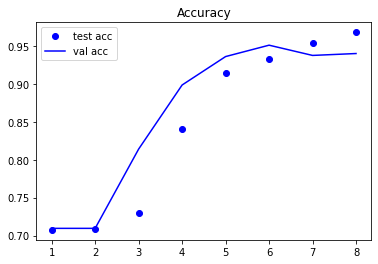

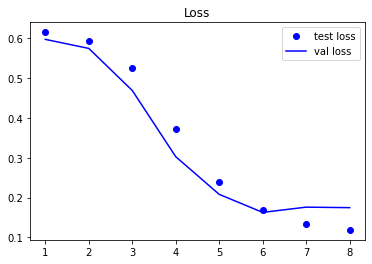

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
vacc = history.history['val_accuracy']
vloss = history.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, acc, 'bo', label='test acc')
plt.plot(epochs, vacc, 'b', label='val acc')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='test loss')
plt.plot(epochs, vloss, 'b', label='val loss')

plt.title('Loss')
plt.legend()

plt.show()